In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import random

In [46]:
X, y = make_blobs(1000, centers=4, random_state=42)

In [63]:
class KMeans:
    
    def __init__(self, n_clusters, iters=10):
        self.n_clusters = n_clusters
        self.iters = iters
        
    def fit(self, X):
        self.X = X
        
        # create k seed points
        points = random.choices(list(X), k=self.n_clusters)
        
        # create clusters corresponding to seed points
        self.clusters = []
        for point in points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
            
        for _ in range(self.iters):
            
            self.labels_ = []
            
            for point in X:
                distances = []
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))
                
                distances_np = np.array(distances)
                min_index = np.argmin(distances_np[:, 0].astype(int))
                selected = self.clusters[min_index]
                selected.points.append(point)
                self.labels_.append(min_index)
                
            for cluster in self.clusters:
                cluster.update_center()

    
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def update_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center - point) ** 2)

    def __repr__(self):
        return str(self.center)
        

In [64]:
model = KMeans(4)

In [65]:
model.fit(X)

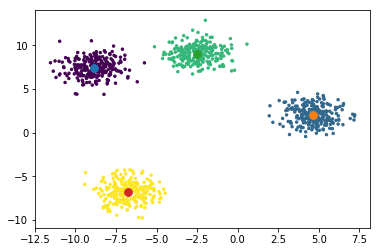

In [77]:
plt.scatter(X[:, 0], X[:, 1], s=6, c=model.labels_)
for i, cluster in enumerate(model.clusters):
    plt.scatter(cluster.center[0], cluster.center[1], s=60)

In [67]:
model.clusters

[[-8.85662684  7.41339818],
 [4.65760511 2.0269603 ],
 [-2.50173875  9.03287546],
 [-6.74543497 -6.81351756]]